# 毕业论文`GRAD`
## MEIC柱状图

---
*@author: Evan*\
*@date: 2023-12-26*

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [45]:
xlspath = meicdata + 'excel/'

years = np.arange(2014,2021)
months = np.arange(1,13)
vars = ['SO2','NOx','CO','VOC','NH3','PM10','PM25','BC','OC']

In [3]:
df_year = {}
for var in vars:
    dfs = {}
    for year in tqdm(years,desc=f'{var}'):
        dfs[year] = pd.read_excel(xlspath + f'{year}.xlsx',
                                  sheet_name=var)
    df_year[var] = pd.concat(dfs,axis=0)
    df_year[var].set_index('year',inplace=True)
    df_year[var].drop(columns=['month','sector'],inplace=True)


OC: 100%|██████████| 7/7 [00:00<00:00, 39.65it/s]


In [4]:
df_month = {}
for var in vars:
    dfs = {}
    for year in tqdm(years,desc=f'{var}'):
        dfs[year] = pd.read_excel(xlspath + f'month_{year}.xlsx',
                                  sheet_name=var)
    df_month[var] = pd.concat(dfs,axis=0)
    df_month[var].set_index('year',inplace=True)
    df_month[var].drop(columns=['sector'],inplace=True)


OC: 100%|██████████| 7/7 [00:00<00:00,  9.71it/s]


## 合并7月与9月

In [5]:
NOx  = df_year['NOx']['Guangdong'].values / 10**6
VOC  = df_year['VOC']['Guangdong'].values / 10**6
PM25 = df_year['PM25']['Guangdong'].values / 10**6

NOx_7  = df_month['NOx'].groupby('month').get_group(7)['Guangdong'].values / 10**6
VOC_7  = df_month['VOC'].groupby('month').get_group(7)['Guangdong'].values / 10**6
PM25_7 = df_month['PM25'].groupby('month').get_group(7)['Guangdong'].values / 10**6

NOx_9  = df_month['NOx'].groupby('month').get_group(9)['Guangdong'].values / 10**6
VOC_9  = df_month['VOC'].groupby('month').get_group(9)['Guangdong'].values / 10**6
PM25_9 = df_month['PM25'].groupby('month').get_group(9)['Guangdong'].values / 10**6


linedict = dict(
    linewidth=3,
    marker='o',
    markersize=6,
    markeredgecolor='k',
)

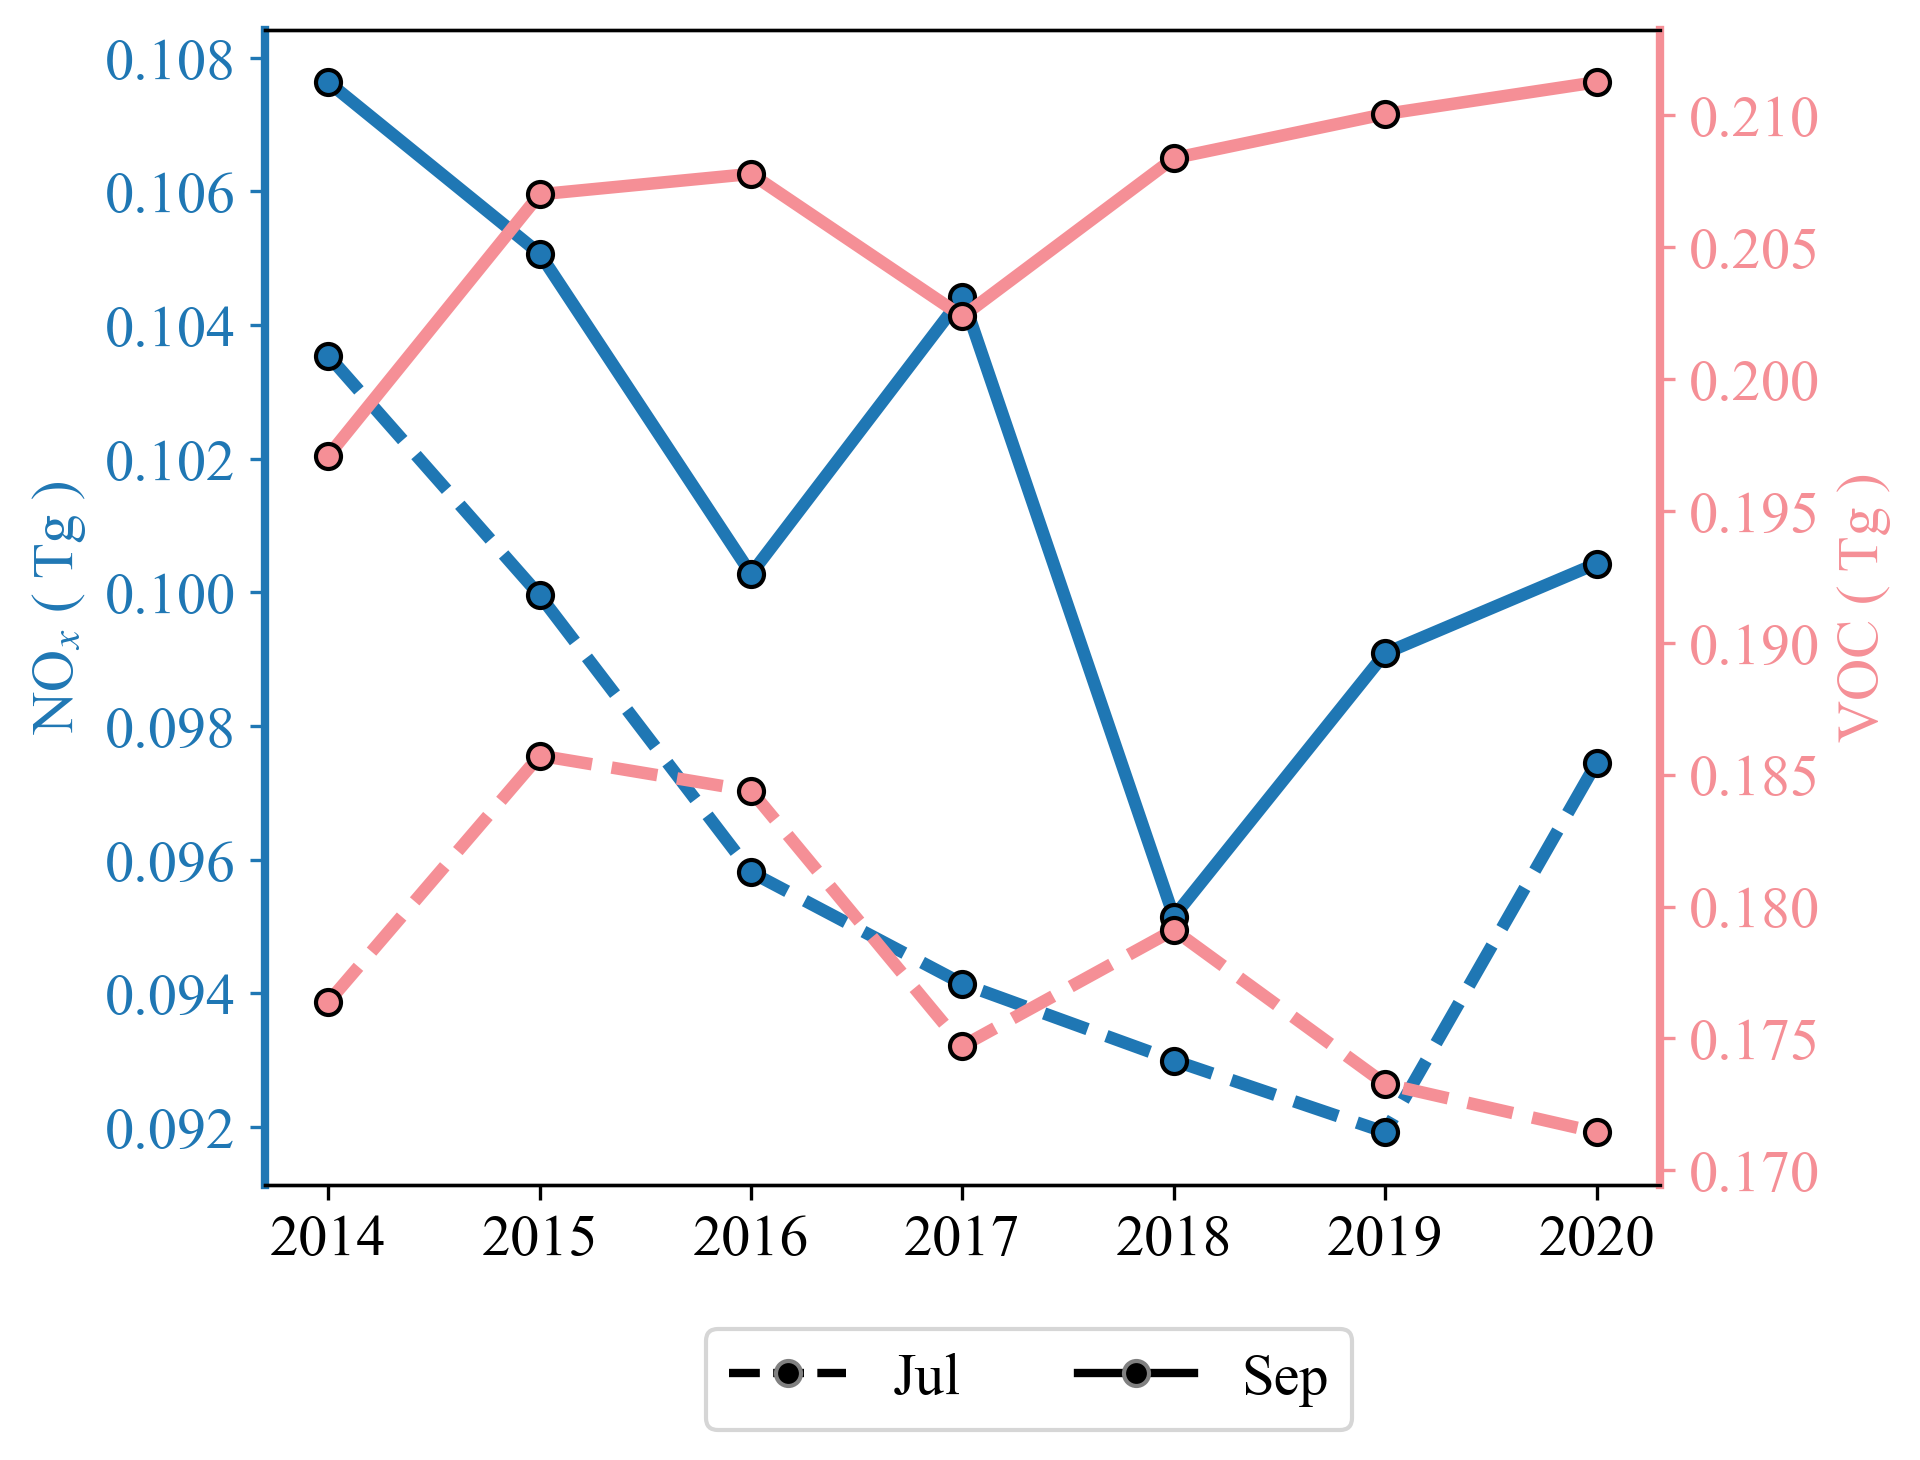

In [40]:
fig, ax1 = plt.subplots(figsize=(6, 5), dpi=300)
axes = [ax1, ax1.twinx(),]

data1 = [NOx_7, VOC_7,]
data2 = [NOx_9, VOC_9,]
colors = ['tab:blue', '#f58f96',]
labels = ['NO$_x$', 'VOC',]

for ax, d, color, label in zip(axes, data1, colors, labels):
    ax.plot(years, d, label=label, color=color, linestyle='--', **linedict)
    ax.set_ylabel(f'{label} ( Tg )', color=color, fontsize=14)
    ax.tick_params(axis='y', colors=color, labelsize=14)

for ax, d, color, label in zip(axes, data2, colors, labels):
    ax.plot(years, d, label=label, color=color, **linedict)

axes[0].tick_params(axis='x', colors='k', labelsize=14)

for i in range(1, len(axes)):
    axes[i].spines['right'].set_color(colors[i])
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['right'].set_linewidth(2)

axes[0].spines['left'].set_color(colors[0])
axes[0].spines['left'].set_linewidth(2)

legend_dict = dict(
    linewidth=2,
    marker='o',
    markersize=6,
    markeredgecolor='gray',
)
legend_lines = [plt.Line2D([0], [0], color='black', linestyle='--',**legend_dict),
                plt.Line2D([0], [0], color='black',**legend_dict)]
legend_labels = ['Jul','Sep']
axes[0].legend(legend_lines, legend_labels,
               bbox_to_anchor=(0.8,-0.1),ncols=2, fontsize=14)

plt.show()

## 月与年合并出图

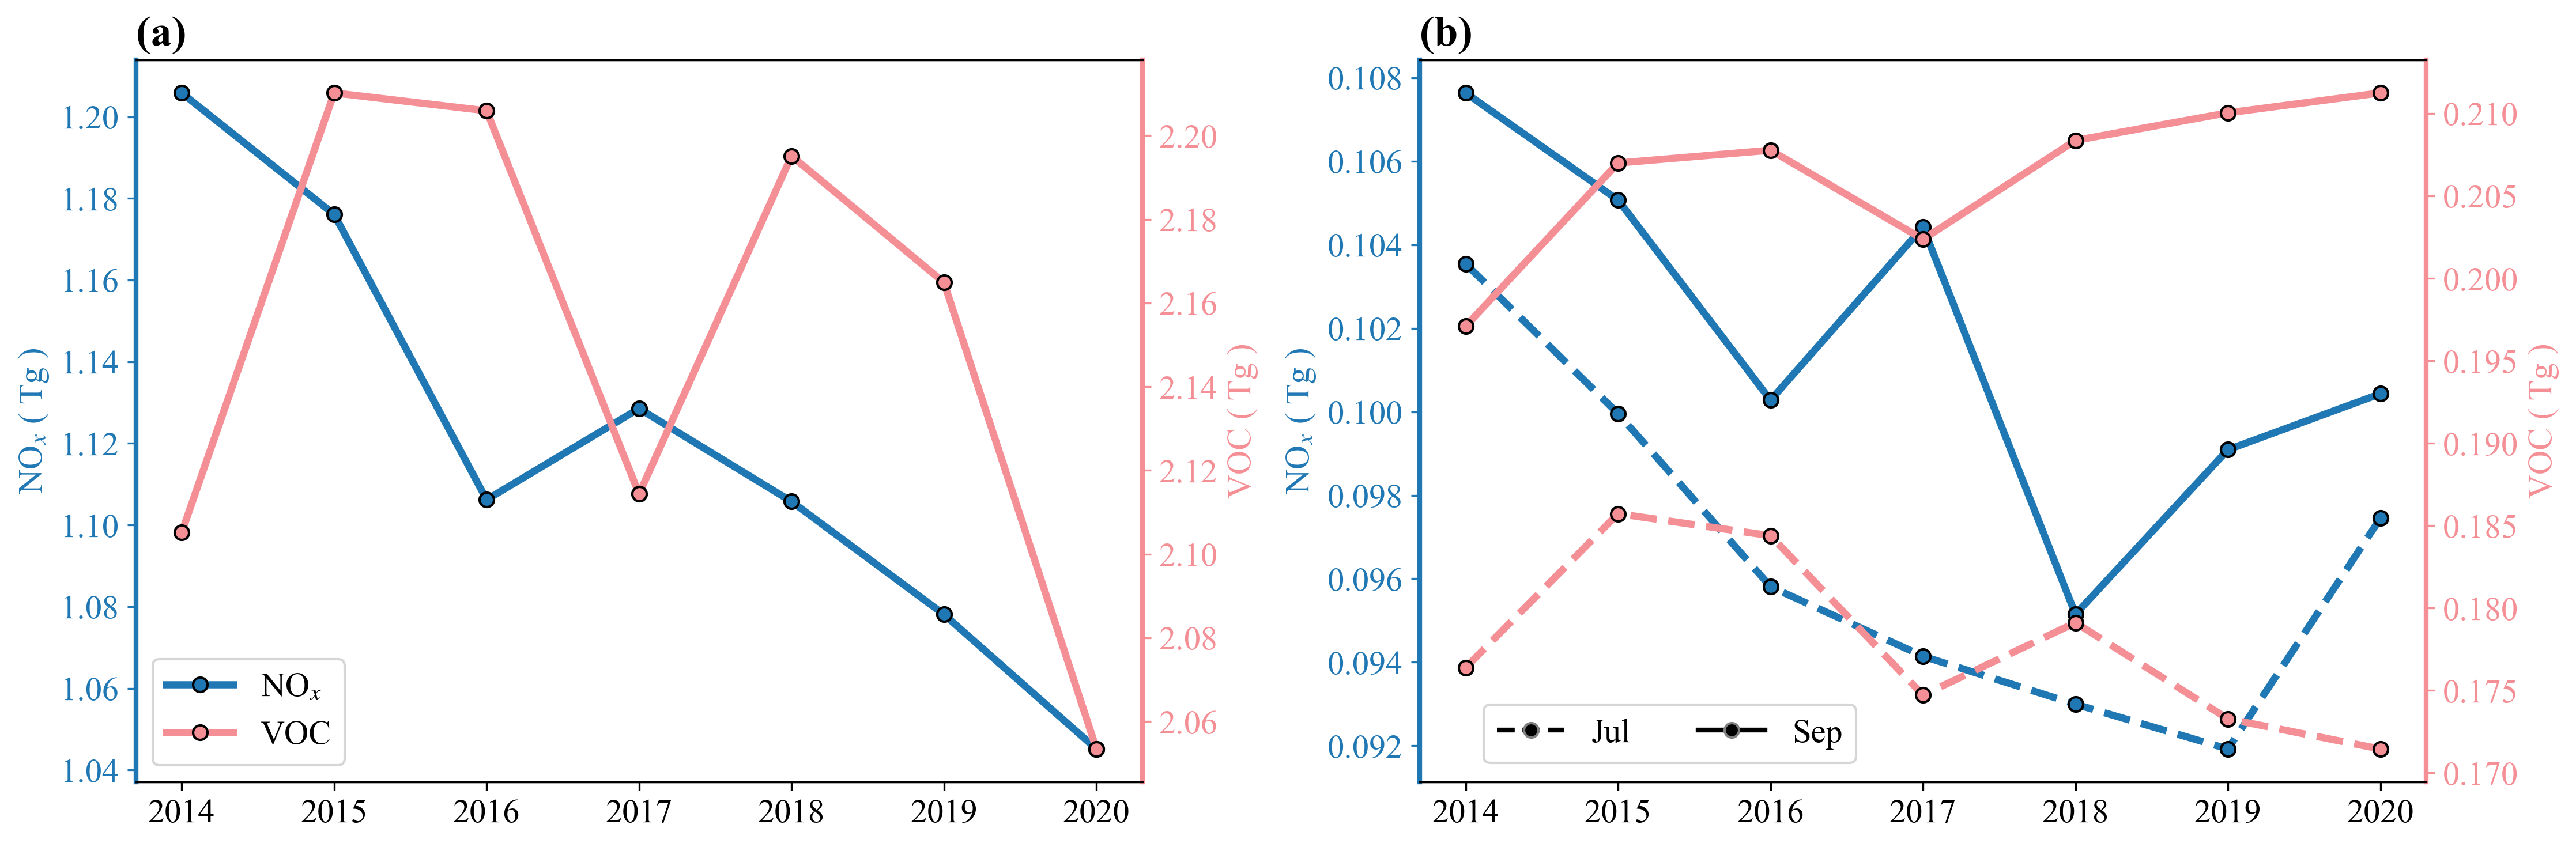

In [27]:
titledict=dict(
    fontsize=18,
    fontweight='bold',
)

fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# 第一个子图
axs1 = [axes[0],axes[0].twinx()]
data = [NOx, VOC]
colors = ['tab:blue', '#f58f96']
labels = ['NO$_x$', 'VOC']

for ax, d, color, label in zip(axs1, data, colors, labels):
    ax.plot(years, d, label=label, color=color, **linedict)
    ax.set_ylabel(f'{label} ( Tg )', color=color, fontsize=14)
    ax.tick_params(axis='y', colors=color, labelsize=14)
    ax.tick_params(axis='x', colors='k', labelsize=14)

axes[0].tick_params(axis='x', colors='k', labelsize=14)

for i in range(1, len(axs1)):
    axs1[i].spines['right'].set_color(colors[i])
    axs1[i].spines['left'].set_visible(False)
    axs1[i].spines['right'].set_linewidth(2)

axs1[0].spines['left'].set_color(colors[0])
axs1[0].spines['left'].set_linewidth(2)
lines = [axs1[0].get_lines()[0], axs1[1].get_lines()[0]]
axes[0].legend(lines, labels, loc=3, fontsize=14)
axes[0].set_title('(a)',loc = 'left',**titledict)

# 第二个子图
axs2 = [axes[1],axes[1].twinx()]

data1 = [NOx_7, VOC_7]
data2 = [NOx_9, VOC_9]
colors = ['tab:blue', '#f58f96']
labels = ['NO$_x$', 'VOC']

for ax, d, color, label in zip(axs2, data1, colors, labels):
    ax.plot(years, d, label=label, color=color, linestyle='--', **linedict)
    ax.set_ylabel(f'{label} ( Tg )', color=color, fontsize=14)
    ax.tick_params(axis='y', colors=color, labelsize=14)
axes[1].tick_params(axis='x', colors='k', labelsize=14)

for ax, d, color, label in zip(axs2, data2, colors, labels):
    ax.plot(years, d, label=label, color=color, **linedict)

for i in range(1, len(axs2)):
    axs2[i].spines['right'].set_color(colors[i])
    axs2[i].spines['left'].set_visible(False)
    axs2[i].spines['right'].set_linewidth(2)

axs2[0].spines['left'].set_color(colors[0])
axs2[0].spines['left'].set_linewidth(2)

axes[1].set_title('(b)',loc='left',**titledict)

# 添加图例
legend_dict = dict(
    linewidth=2,
    marker='o',
    markersize=6,
    markeredgecolor='gray',
)
legend_lines = [plt.Line2D([0], [0], color='black', linestyle='--', **legend_dict),
                plt.Line2D([0], [0], color='black', **legend_dict)]
legend_labels = ['Jul', 'Sep']
axes[1].legend(legend_lines, legend_labels, bbox_to_anchor=(0.45, 0.13), ncols=2, fontsize=14)

plt.tight_layout()
plt.show()

## 月份数据画月变化

In [47]:
NOx_month = df_month['NOx']['Guangdong'].loc[df_month['NOx'].index == 2019].values / 10**6
VOC_month = df_month['VOC']['Guangdong'].loc[df_month['VOC'].index == 2019].values / 10**6

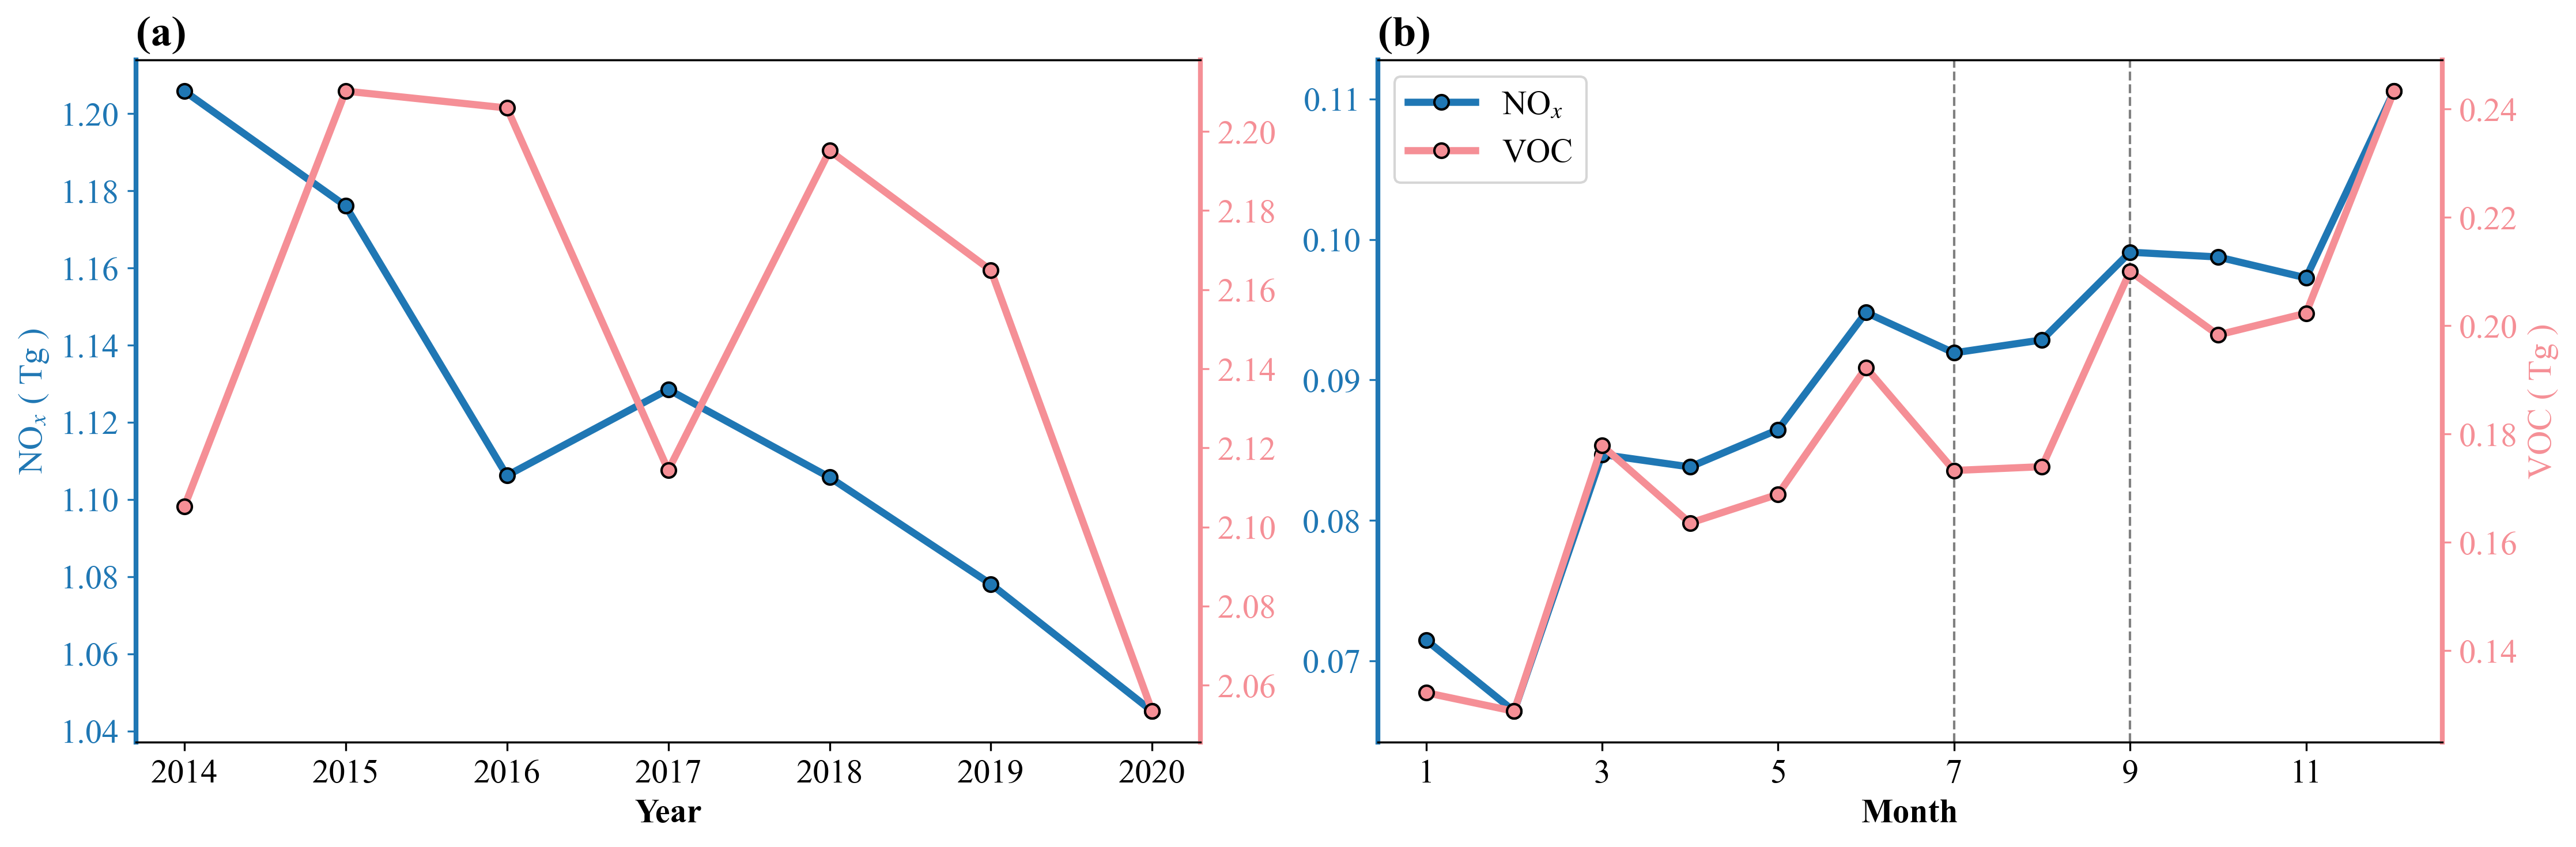

In [72]:
titledict=dict(
    fontsize=18,
    fontweight='bold',
)
labeldict=dict(
    fontsize=14,
    fontweight='bold',
)

colors = ['tab:blue', '#f58f96']
labels = ['NO$_x$', 'VOC']

fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# 第一个子图
# =============================================
axs1 = [axes[0],axes[0].twinx()]
data = [NOx, VOC]

for ax, d, color, label in zip(axs1, data, colors, labels):
    ax.plot(years, d, label=label, color=color, **linedict)
    ax.set_ylabel(f'{label} ( Tg )', color=color, fontsize=14)
    ax.tick_params(axis='y', colors=color,labelsize=14)
    ax.tick_params(axis='x', colors='k',labelsize=14)

axes[0].tick_params(axis='x', colors='k',labelsize=14)

for i in range(1, len(axs1)):
    axs1[i].spines['right'].set_color(colors[i])
    axs1[i].spines['left'].set_visible(False)
    axs1[i].spines['right'].set_linewidth(2)

axs1[0].spines['left'].set_color(colors[0])
axs1[0].spines['left'].set_linewidth(2)
axes[0].set_xlabel('Year',**labeldict)
axes[0].set_title('(a)',loc = 'left',**titledict)


# 第二个子图
# =============================================
axs2 = [axes[1],axes[1].twinx()]
data = [NOx_month, VOC_month]

for ax, d, color, label in zip(axs2, data, colors, labels):
    ax.plot(months, d, label=label, color=color, **linedict)
    ax.set_ylabel(f'{label} ( Tg )', color=color, fontsize=14)
    ax.tick_params(axis='y', colors=color,labelsize=14)
    ax.tick_params(axis='x', colors='k',labelsize=14)

axes[0].tick_params(axis='x', colors='k',labelsize=14)

for i in range(1, len(axs2)):
    axs2[i].spines['right'].set_color(colors[i])
    axs2[i].spines['left'].set_visible(False)
    axs2[i].spines['right'].set_linewidth(2)

axs2[0].spines['left'].set_color(colors[0])
axs2[0].spines['left'].set_linewidth(2)

axes[1].set_xticks(np.arange(1, 13, 2))
axes[1].set_xlabel('Month',**labeldict)
axes[1].set_title('(b)',loc='left',**titledict)

# 辅助线
axes[1].axvline(x=7, color='gray', linestyle='--', linewidth=1,zorder=0)
axes[1].axvline(x=9, color='gray', linestyle='--', linewidth=1,zorder=0)

# 去掉中间两个轴的名称
axs1[1].set_ylabel('')
axs2[0].set_ylabel('')

# legend
lines = [axs2[0].get_lines()[0], axs2[1].get_lines()[0]]
axes[1].legend(lines, labels, loc=2, fontsize=14)

plt.tight_layout()
plt.show()